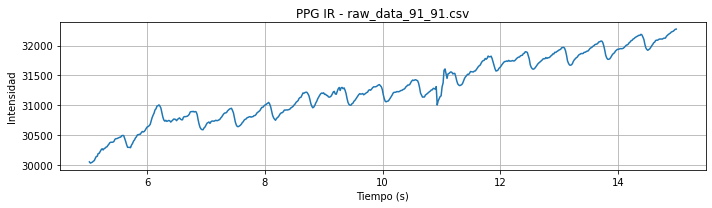

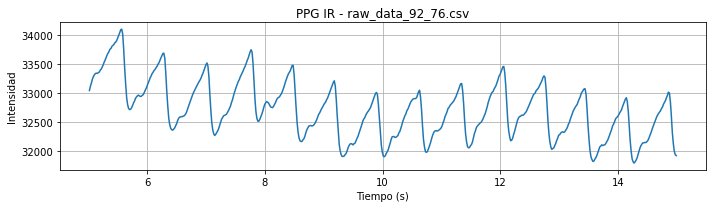

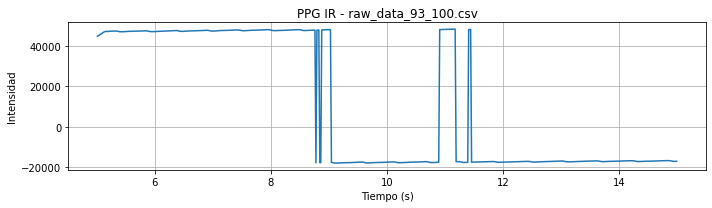

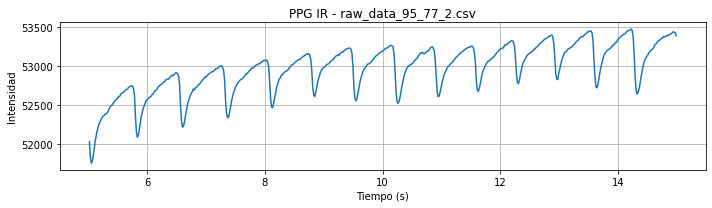

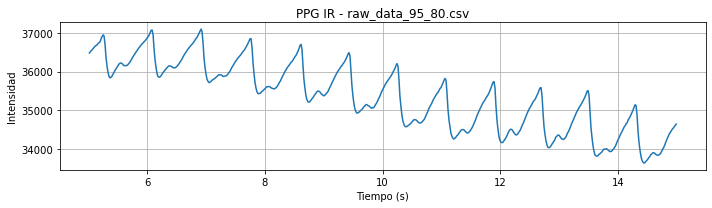

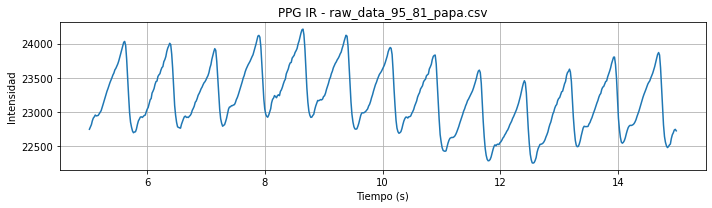

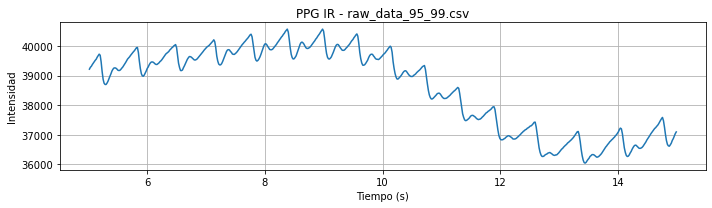

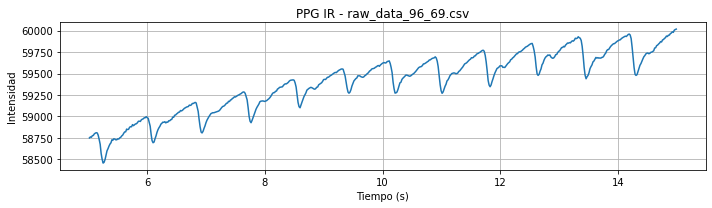

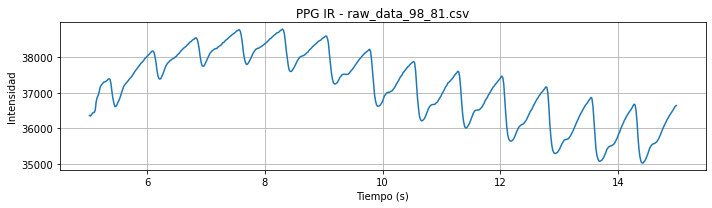

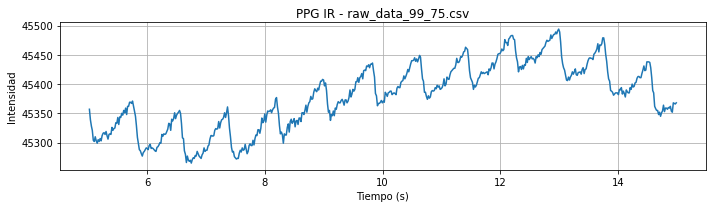

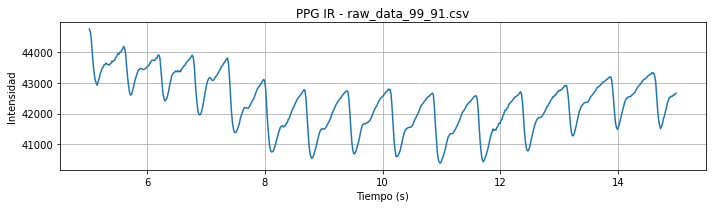

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ruta carpeta local
carpeta = "C:/Users/Elena/Desktop/GitHub/TFG-Elena-Ruiz/Datos/Procesados"
archivos = [f for f in os.listdir(carpeta) if f.endswith(".csv")]

# Parámetros para la gráfica
ventana_segundos = 10
fs = 60  # Frecuencia de muestreo estimada
n_muestras = ventana_segundos * fs

# Graficar cada archivo
for archivo in archivos:
    ruta_completa = os.path.join(carpeta, archivo)
    df = pd.read_csv(ruta_completa)
    
    if all(col in df.columns for col in ["IR", "AMB_IR", "Tiempo (ms)"]):
        df["IR_corr"] = df["IR"] - df["AMB_IR"]
        df["Tiempo_s"] = df["Tiempo (ms)"] / 1000
        df_recorte = df.iloc[:n_muestras]

        plt.figure(figsize=(10, 3))
        plt.plot(df_recorte["Tiempo_s"], df_recorte["IR_corr"], label="IR corregido")
        plt.title(f"PPG IR - {archivo}")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Intensidad")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Saltando archivo (faltan columnas): {archivo}")
